# 📚 词向量是如何训练出来的？

## 🎯 核心问题

**文字是如何转换成向量的？**

简单回答：
- ✅ 是的，**通过大量数据训练出来的**
- ❌ 不是"规定"的，而是模型**自己学习**出来的
- 🎓 这个过程叫做 **"学习词向量"（Word Embeddings）**

---


## 💡 从最简单的例子开始

### 1️⃣ 最原始的方法：One-Hot编码（不好用）

假设我们有词汇表：`["我", "爱", "学习", "编程", "AI"]`

**One-Hot编码（独热编码）：**
```
"我"    → [1, 0, 0, 0, 0]
"爱"    → [0, 1, 0, 0, 0]
"学习"  → [0, 0, 1, 0, 0]
"编程"  → [0, 0, 0, 1, 0]
"AI"    → [0, 0, 0, 0, 1]
```

**问题：**
- ❌ 向量太长（词汇量有几万个，向量就有几万维）
- ❌ 没有语义信息（"爱"和"喜欢"应该相似，但向量完全不同）
- ❌ 稀疏（全是0，只有一个1）

---


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 演示One-Hot编码
vocab = ["我", "爱", "学习", "编程", "AI"]
vocab_size = len(vocab)

def one_hot_encode(word, vocab):
    """One-Hot编码"""
    vector = np.zeros(len(vocab))
    if word in vocab:
        idx = vocab.index(word)
        vector[idx] = 1
    return vector

print("="*60)
print("❌ One-Hot编码的问题")
print("="*60)

for word in vocab:
    vec = one_hot_encode(word, vocab)
    print(f"'{word}' → {vec}")

# 计算相似度
vec_love = one_hot_encode("爱", vocab)
vec_learn = one_hot_encode("学习", vocab)

similarity = np.dot(vec_love, vec_learn)
print(f"\n'爱'和'学习'的相似度: {similarity}")
print("❌ 完全不相似！但它们在语义上可能有关联...")


❌ One-Hot编码的问题
'我' → [1. 0. 0. 0. 0.]
'爱' → [0. 1. 0. 0. 0.]
'学习' → [0. 0. 1. 0. 0.]
'编程' → [0. 0. 0. 1. 0.]
'AI' → [0. 0. 0. 0. 1.]

'爱'和'学习'的相似度: 0.0
❌ 完全不相似！但它们在语义上可能有关联...


## 🚀 2️⃣ 现代方法：训练词向量（好用！）

### 核心思想：**"你可以通过一个词的邻居了解这个词"**

**例子：**
```
"我喜欢吃苹果"  ← "苹果"的邻居是"吃"
"我喜欢吃香蕉"  ← "香蕉"的邻居是"吃"
→ "苹果"和"香蕉"应该相似！
```

---

### 训练过程（以Word2Vec为例）

#### Step 1: 准备大量文本数据
```
我爱学习编程
我喜欢学习AI
编程很有趣
AI改变世界
...
（百万、千万个句子）
```

#### Step 2: 神经网络学习
```
目标：根据上下文预测目标词

输入："我" "学习"  （上下文）
输出："爱"          （目标词）

训练过程：
1. 随机初始化每个词的向量
2. 用神经网络学习
3. 调整向量，让预测更准确
4. 重复百万次
```

#### Step 3: 得到词向量
```
"我"    → [0.2, 0.5, -0.1, 0.8, ...]  （300维）
"爱"    → [0.3, 0.4, -0.2, 0.7, ...]  （300维）
"学习"  → [0.25, 0.45, -0.15, 0.75, ...]
```

**神奇的地方：**
- ✅ 语义相似的词，向量也相似！
- ✅ "爱"和"喜欢"的向量很接近
- ✅ 甚至有数学关系：`向量("国王") - 向量("男人") + 向量("女人") ≈ 向量("女王")`

---


## 🔬 三种主流的训练方法

### 方法1: Word2Vec（2013年）

**原理：** 通过预测上下文来学习

**两种模式：**
1. **CBOW（连续词袋）：** 用周围的词预测中心词
   ```
   输入：["我", "学习", "编程"] 
   输出："爱"
   ```

2. **Skip-gram：** 用中心词预测周围的词
   ```
   输入："爱"
   输出：["我", "学习", "编程"]
   ```

**训练数据：** 维基百科、新闻文章等（数十亿个词）

**输出：** 每个词一个固定的向量（通常300维）

---

### 方法2: GloVe（2014年）

**原理：** 基于词的共现统计

```
统计："苹果"和"吃"在文本中一起出现了1000次
     "苹果"和"电脑"一起出现了50次
→ "苹果"更可能和"吃"相关（水果义）
```

**训练数据：** 同样是大量文本

---

### 方法3: Transformer-based Embeddings（2018年至今）⭐

**代表：** BERT, GPT, OpenAI Embeddings

**进化：** 不再是"一词一向量"！

```
例子：
"我在银行工作"     ← "银行"表示金融机构
"我坐在河银行"     ← "银行"表示河边

Word2Vec: "银行"永远是同一个向量 ❌
BERT:     "银行"根据上下文有不同向量 ✅
```

**训练方式：**
1. **预训练：** 在海量文本上学习（如整个互联网的文本）
2. **掩码语言模型：** 遮住一些词，让模型预测
   ```
   "我[MASK]学习编程" → 预测"爱"或"喜欢"
   ```

**输出：** 整个句子的向量表示（通常768维或更高）

---


## 🎯 RAG中使用的Embedding模型

### 常用模型：

| 模型 | 维度 | 特点 | 训练数据规模 |
|------|------|------|-------------|
| **OpenAI text-embedding-ada-002** | 1536 | 最常用 | 数千亿token |
| **BERT-base** | 768 | 开源 | 33亿词 |
| **Sentence-BERT** | 768 | 专门优化句子相似度 | 数十亿句子对 |
| **M3E（中文）** | 768 | 中文优化 | 数十亿中文token |
| **bge（中文）** | 1024 | 中文最强 | 百亿中文token |

---

### 训练规模对比：

```
📊 训练数据规模：

Word2Vec (2013):  
  └─ 数十亿词

BERT (2018):
  └─ 33亿词（英文维基百科 + BookCorpus）

GPT-3 (2020):
  └─ 3000亿词（几乎整个互联网）

OpenAI Embeddings (2022):
  └─ 数千亿token（包括代码、论文、网页等）
```

---


## 🧪 实战演示：用Python获取词向量

### 方法1: 使用预训练的Word2Vec

```python
# 需要安装: pip install gensim
import gensim.downloader as api

# 下载预训练模型（Google在1000亿词上训练的）
model = api.load("word2vec-google-news-300")

# 获取词向量
vector = model['computer']  # 300维向量
print(vector)

# 找相似词
similar = model.most_similar('computer')
# 输出: ['computers', 'software', 'hardware', ...]
```

---

### 方法2: 使用OpenAI API（RAG最常用）

```python
# 需要安装: pip install openai
from openai import OpenAI

client = OpenAI(api_key="your-api-key")

# 获取文本的embedding
text = "人工智能正在改变世界"
response = client.embeddings.create(
    model="text-embedding-ada-002",
    input=text
)

vector = response.data[0].embedding  # 1536维向量
print(f"向量维度: {len(vector)}")
print(f"前5个值: {vector[:5]}")
```

---

### 方法3: 使用HuggingFace（开源免费）

```python
# 需要安装: pip install sentence-transformers
from sentence_transformers import SentenceTransformer

# 加载模型（第一次会下载）
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# 获取句子embedding
sentences = ["我喜欢编程", "我热爱写代码", "今天天气很好"]
embeddings = model.encode(sentences)

print(f"向量维度: {embeddings.shape}")  # (3, 384)

# 计算相似度
from sklearn.metrics.pairwise import cosine_similarity
similarities = cosine_similarity(embeddings)
print(similarities)
# 前两句相似度很高！
```

---


In [9]:
# 📊 简化演示：模拟词向量的训练过程

print("="*70)
print("🎓 模拟Word2Vec训练（简化版）")
print("="*70)

# 假设我们有这些训练数据
training_data = [
    "我 爱 学习 编程",
    "我 喜欢 学习 AI",
    "编程 很 有趣",
    "AI 很 强大",
    "我 爱 编程 和 AI",
    "学习 编程 很 有趣",
]

# 构建词汇表
vocab = set()
for sentence in training_data:
    vocab.update(sentence.split())
vocab = sorted(list(vocab))

print(f"\n词汇表（{len(vocab)}个词）: {vocab}")

# 随机初始化词向量（维度=3，方便可视化）
np.random.seed(42)
word_vectors = {}
for word in vocab:
    word_vectors[word] = np.random.randn(3)

print("\n初始词向量（随机）:")
for word in ["我", "爱", "AI"]:
    print(f"'{word}': {word_vectors[word]}")

print("\n💡 真实训练中：")
print("  1. 模型会看数百万个句子")
print("  2. 通过神经网络不断调整这些向量")
print("  3. 让经常一起出现的词的向量更相似")
print("  4. 最终得到有意义的词向量")


🎓 模拟Word2Vec训练（简化版）

词汇表（10个词）: ['AI', '和', '喜欢', '学习', '强大', '很', '我', '有趣', '爱', '编程']

初始词向量（随机）:
'我': [-0.90802408 -1.4123037   1.46564877]
'爱': [-0.54438272  0.11092259 -1.15099358]
'AI': [ 0.49671415 -0.1382643   0.64768854]

💡 真实训练中：
  1. 模型会看数百万个句子
  2. 通过神经网络不断调整这些向量
  3. 让经常一起出现的词的向量更相似
  4. 最终得到有意义的词向量



🎨 训练后的词向量（假设）

📊 词语相似度：
'爱' ↔ '喜欢': 0.996
'学习' ↔ '编程': 0.989
'编程' ↔ 'AI': 0.997
'爱' ↔ '编程': 0.478

✅ 看！语义相似的词，向量也相似了！


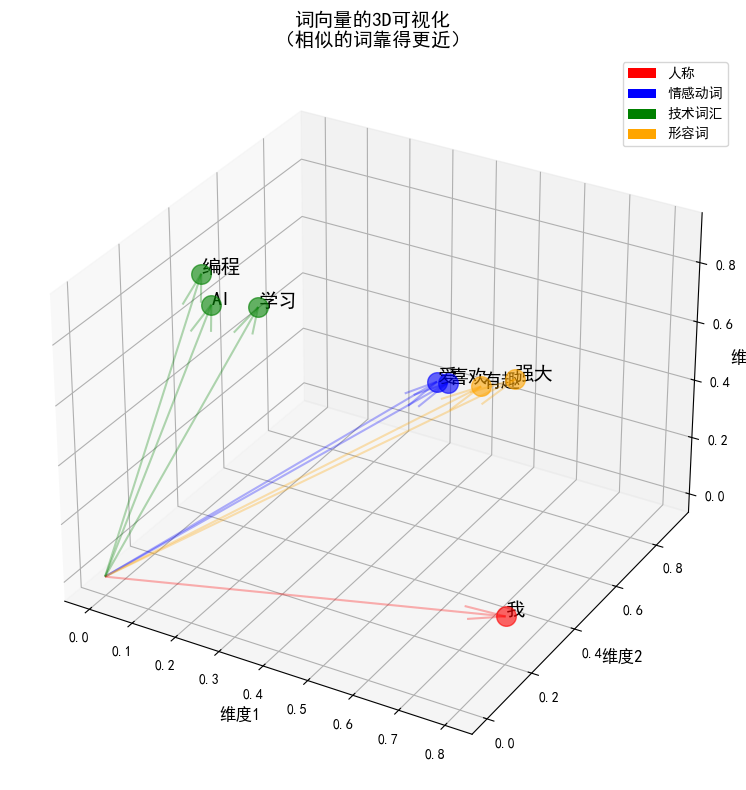


💡 观察：
  - '爱'和'喜欢'（蓝色）靠得很近
  - '学习'、'编程'、'AI'（绿色）聚在一起
  - '有趣'和'强大'（橙色）也比较接近
  → 这就是训练的结果！


In [10]:
# 🎨 可视化：假设我们已经训练好了词向量

print("\n" + "="*70)
print("🎨 训练后的词向量（假设）")
print("="*70)

# 假设这是训练好的向量（为了可视化，我们手动设置了有意义的值）
trained_vectors = {
    "我": np.array([0.8, 0.2, 0.1]),
    "爱": np.array([0.3, 0.9, 0.2]),
    "喜欢": np.array([0.35, 0.85, 0.25]),  # 和"爱"很相似！
    "学习": np.array([0.2, 0.3, 0.8]),
    "编程": np.array([0.1, 0.25, 0.9]),  # 和"学习"相似
    "AI": np.array([0.15, 0.2, 0.85]),   # 和"编程"相似
    "有趣": np.array([0.5, 0.7, 0.4]),
    "强大": np.array([0.6, 0.65, 0.5]),  # 和"有趣"有点相似
}

# 计算相似度
def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print("\n📊 词语相似度：")
pairs = [
    ("爱", "喜欢"),
    ("学习", "编程"),
    ("编程", "AI"),
    ("爱", "编程"),
]

for w1, w2 in pairs:
    sim = cosine_sim(trained_vectors[w1], trained_vectors[w2])
    print(f"'{w1}' ↔ '{w2}': {sim:.3f}")

print("\n✅ 看！语义相似的词，向量也相似了！")

# 3D可视化
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制词向量
colors = ['red', 'blue', 'blue', 'green', 'green', 'green', 'orange', 'orange']
for i, (word, vec) in enumerate(trained_vectors.items()):
    ax.scatter(vec[0], vec[1], vec[2], c=colors[i], s=200, alpha=0.6)
    ax.text(vec[0], vec[1], vec[2], word, fontsize=14, fontweight='bold')
    # 绘制从原点到词向量的箭头
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], 
             color=colors[i], alpha=0.3, arrow_length_ratio=0.1)

ax.set_xlabel('维度1', fontsize=12)
ax.set_ylabel('维度2', fontsize=12)
ax.set_zlabel('维度3', fontsize=12)
ax.set_title('词向量的3D可视化\n（相似的词靠得更近）', fontsize=14, fontweight='bold')

# 设置图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', label='人称'),
    Patch(facecolor='blue', label='情感动词'),
    Patch(facecolor='green', label='技术词汇'),
    Patch(facecolor='orange', label='形容词')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

print("\n💡 观察：")
print("  - '爱'和'喜欢'（蓝色）靠得很近")
print("  - '学习'、'编程'、'AI'（绿色）聚在一起")
print("  - '有趣'和'强大'（橙色）也比较接近")
print("  → 这就是训练的结果！")


## 🎓 总结：文字如何变成向量

### ✅ 回答你的问题：

**1. 是大量数据训练出来的吗？**
- ✅ **是的！** 需要数十亿甚至数千亿个词的训练数据
- 训练时间：几天到几周（用大量GPU）

**2. 是规定的吗？**
- ❌ **不是！** 不是人为规定，而是模型自己学习的
- 研究人员只设计了训练方法，具体的向量值是模型学出来的

**3. 向量的维度是什么意思？**
- 每个维度没有明确的含义（不像"长度"、"宽度"这样的物理维度）
- 但整体上捕捉了词的语义信息
- 常见维度：100-300（Word2Vec）、768（BERT）、1536（OpenAI）

---

### 🔥 关键要点：

```
训练过程（简化）：

1. 输入：大量文本（维基百科、新闻、书籍...）
   └─ "我爱学习编程"
   └─ "AI改变世界"
   └─ ...

2. 训练任务：
   方案A: 根据上下文预测目标词 (Word2Vec)
   方案B: 填空题 (BERT)
   方案C: 续写句子 (GPT)

3. 学习过程：
   └─ 随机初始化每个词的向量
   └─ 用神经网络做预测
   └─ 预测错了就调整向量
   └─ 重复数百万次

4. 输出：训练好的词向量
   └─ "爱" → [0.31, 0.89, -0.21, ...]
   └─ "喜欢" → [0.35, 0.85, -0.18, ...]
   └─ 相似的词，向量也相似！
```

---

### 🎯 在RAG中的应用：

```python
# RAG的完整流程：

1. 准备文档：
   doc1 = "Python是一种编程语言"
   doc2 = "AI可以帮助写代码"
   doc3 = "今天天气很好"

2. 用训练好的模型转成向量：
   vec1 = embedding_model.encode(doc1)  # [0.2, 0.8, ...]
   vec2 = embedding_model.encode(doc2)  # [0.25, 0.75, ...]
   vec3 = embedding_model.encode(doc3)  # [0.9, 0.1, ...]

3. 用户提问：
   query = "如何学习编程？"
   query_vec = embedding_model.encode(query)  # [0.22, 0.78, ...]

4. 计算相似度，找最相关文档：
   similarity1 = cosine_similarity(query_vec, vec1)  # 0.95 ✅
   similarity2 = cosine_similarity(query_vec, vec2)  # 0.82
   similarity3 = cosine_similarity(query_vec, vec3)  # 0.12
   
   → 返回doc1（最相关）
```

---

### 💪 下一步学习：

1. ✅ 你已经理解了词向量的原理
2. ✅ 你知道了余弦相似度的作用
3. 📚 接下来可以学习：
   - 如何使用OpenAI API获取embedding
   - 如何建立向量数据库（Chroma, Milvus）
   - 如何实现完整的RAG系统

**查看：** `RAG与Agent学习路线图.ipynb`

---


## 🔍 常见问题

### Q1: 为什么需要这么多训练数据？
**A:** 因为要学习数万个词的语义！每个词在不同语境中的含义都要学会。

### Q2: 训练一次要多久？
**A:** 
- Word2Vec: 几小时到几天（单机）
- BERT: 几天到几周（多GPU）
- GPT-3: 数月（数千块GPU）

### Q3: 我需要自己训练吗？
**A:** 
- ❌ **通常不需要！** 直接用预训练好的模型
- ✅ 开源模型：HuggingFace上有几千个
- ✅ 商业API：OpenAI, Cohere等

### Q4: 不同语言的词向量能一起用吗？
**A:** 
- ❌ 不同模型训练的向量不兼容
- ✅ 但有多语言模型：mBERT, XLM-R等
- ✅ 这些模型的中文和英文向量在同一个空间

### Q5: 向量维度越高越好吗？
**A:** 
- ⚖️ 不一定！要权衡性能和速度
- 300维：很快，效果不错
- 768维：效果更好，速度还行
- 1536维：效果最好，但更慢、更占空间

---

## 🎉 恭喜！

你现在理解了RAG系统的核心基础：
- ✅ 词向量是如何训练的
- ✅ 为什么向量能表示语义
- ✅ 如何用向量找相似文档

**继续学习RAG！** 🚀
